# CASESTUDY ON UNSUPERVISED LEARNING

# Importing the Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Loading the Dataset into the Python Environment

In [2]:
data = pd.read_csv("Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Descriptive Analytics

In [3]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

<h3>Insight:</h3>
    
The data contains 13 features.

In [4]:
data.shape

(178, 13)

<h3>Insight:</h3>
    
The data contains 178 observations and 13 features

In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

<h3>Insight:</h3>
    
Data has only float and integer values.

In [6]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
AgglomerativeClustering   type         <class 'sklearn.cluster._<...>AgglomerativeClustering'>
KMeans                    type         <class 'sklearn.cluster._kmeans.KMeans'>
Normalizer                type         <class 'sklearn.preprocessing._data.Normalizer'>
PCA                       ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
data                      DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
dendrogram                function     <function dendrogram at 0x0000020D448E2940>
linkage                   function     <function linkage at 0x0000020D448E13A0>
make_pipeline             function     <function make_pipeline at 0x0000020D45131160>
np                        module       <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
pd                       

In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Checking the skewness of our dataset.
<ol>
<li>A normally distribuited data has a skewness close to zero.</li>
<li>Skewness greather than zero means that there is more weight in the left side of the data.</li>
<li>In another hand, skewness smaller than 0 means that there is more weight in the right side of the data</li>
</ol>

In [8]:
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

<h3>Insight:</h3> 

There is no missing data.

In [9]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<h3>Insights:</h3>
<ol>
<li>As we can see here, mean value is less than the median value of each column.</li>
<li>There is a large difference between the 75th% tile and max values of Ash_Alcanity, Magnesium & Proline.</li>
</ol>

In [10]:
for cols in data.columns.values:
    print("Number of unique values in the feature {} = {}".format(cols, data[cols].nunique()))    

Number of unique values in the feature Alcohol = 126
Number of unique values in the feature Malic_Acid = 133
Number of unique values in the feature Ash = 79
Number of unique values in the feature Ash_Alcanity = 63
Number of unique values in the feature Magnesium = 53
Number of unique values in the feature Total_Phenols = 97
Number of unique values in the feature Flavanoids = 132
Number of unique values in the feature Nonflavanoid_Phenols = 39
Number of unique values in the feature Proanthocyanins = 101
Number of unique values in the feature Color_Intensity = 132
Number of unique values in the feature Hue = 78
Number of unique values in the feature OD280 = 122
Number of unique values in the feature Proline = 121


<h3>Insights:</h3>
<ol>
<li>The feature that has a maximum unique value is Malic_acid.</li>
<li>The feature that has a minimum unique value is Nonflavanoid_Phenols.</li>
</ol>

# Exploratory Data Analytics

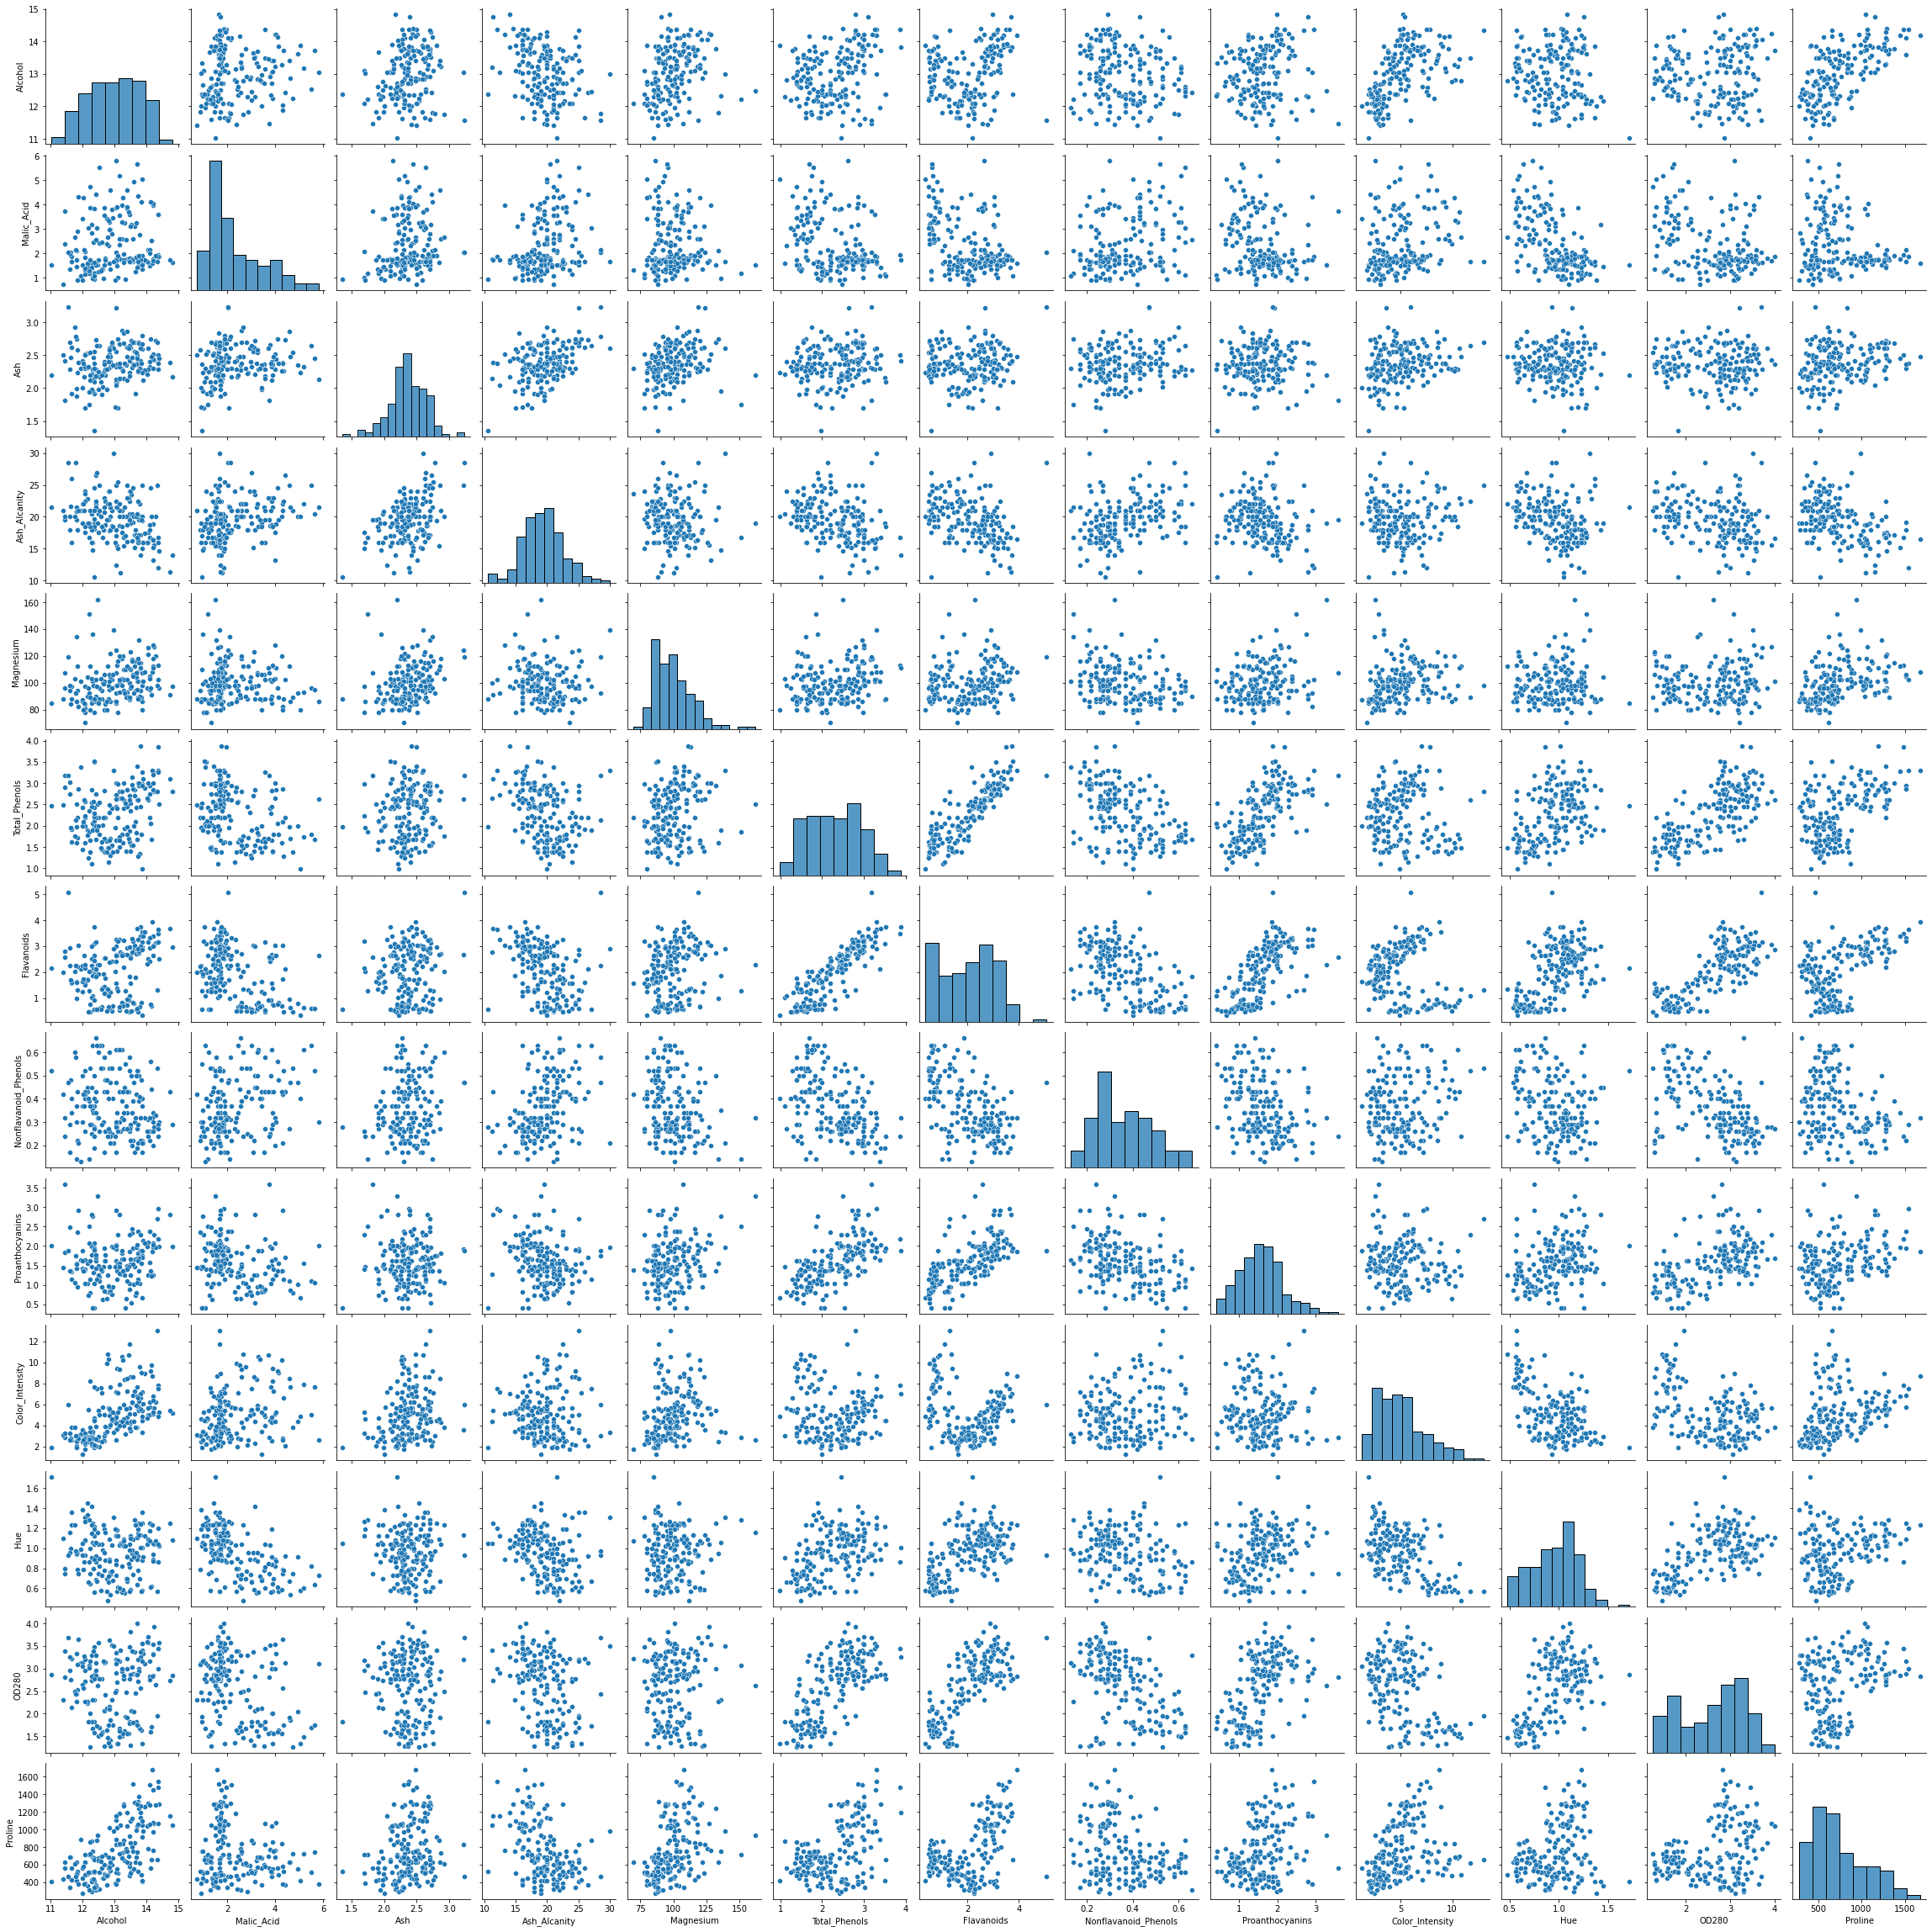

In [11]:
sns.pairplot(data)

[]

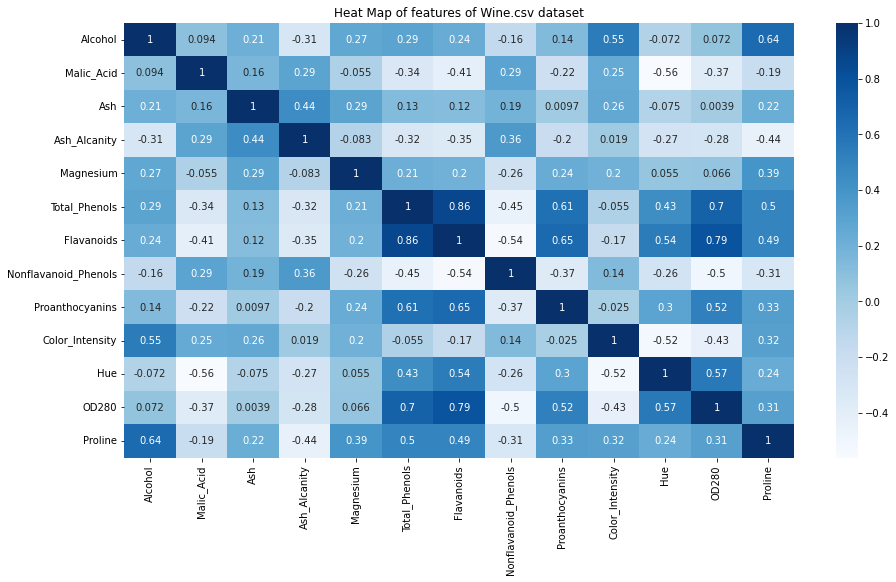

In [12]:
plt.figure(figsize=(15,8))
plt.title('Heat Map of features of Wine.csv dataset')
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.plot()

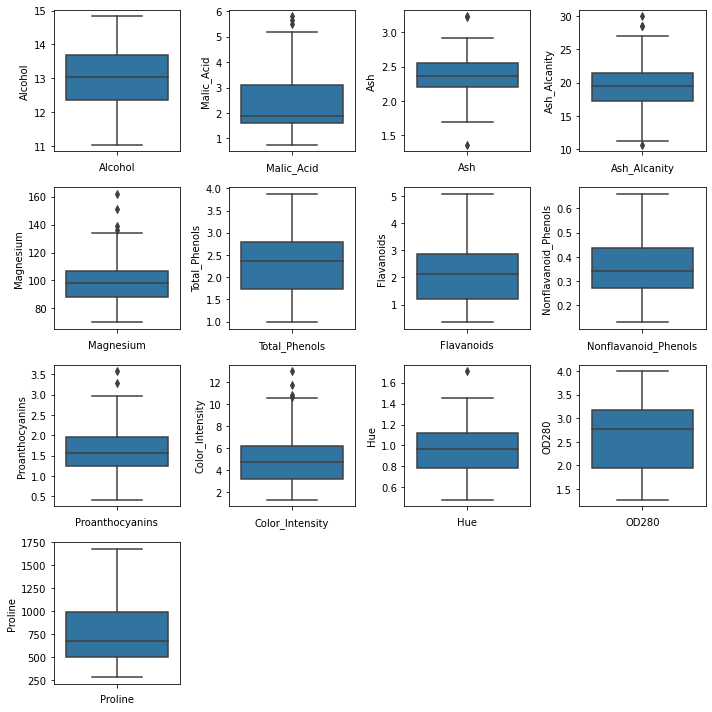

In [13]:
fig = plt.figure(figsize=(10,10))
for i in range(len(data.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=data.iloc[:,i])
    plt.xlabel(data.columns[i])
plt.tight_layout()
plt.show()

Plotting the histogram of each numerical features, the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:
    
1.Check the kind of each feature distribution

2.Check data symmetry

3.Verify features frequency

4.Identify outliers

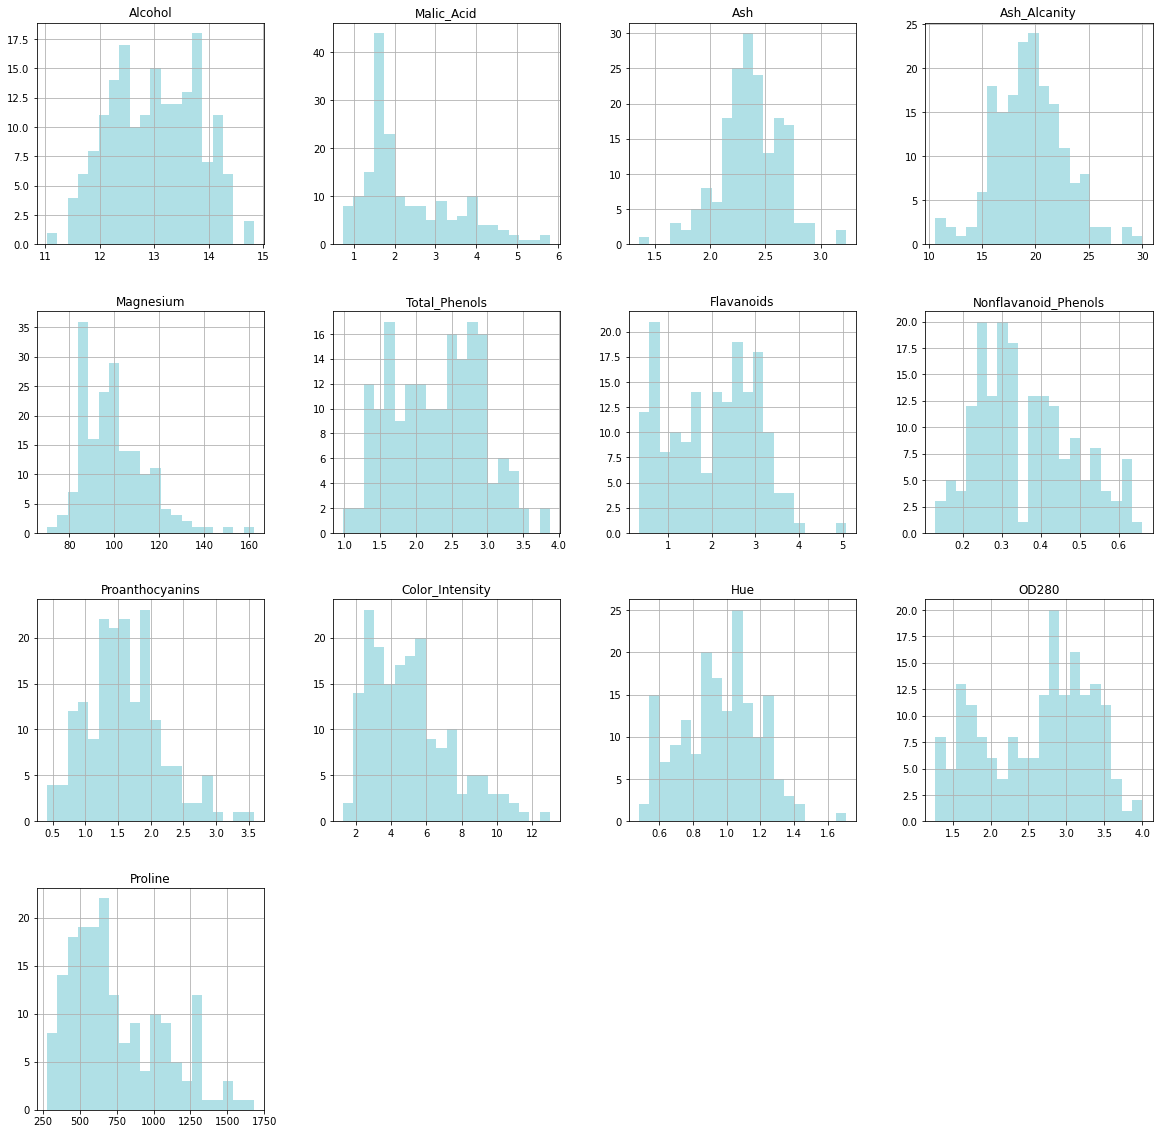

In [14]:
plt.rcParams["figure.figsize"] = (20, 20)
data.hist(bins=20, color = 'powderblue')
plt.show()

# Data Pre-processing

In [15]:
data_cluster=data.copy()
data_agglo=data.copy()
data_pca = data.copy()

<h3>Standard Scaling</h3>

In [16]:
scaler = StandardScaler()
data_cluster = scaler.fit_transform(data_cluster)
data_agglo = scaler.fit_transform(data_agglo)
data_pca -= scaler.fit_transform(data_pca)

# KMeans Clustering

In [17]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(data_cluster)

centroids = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_
y_kmeans = kmeans.predict(data_cluster)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


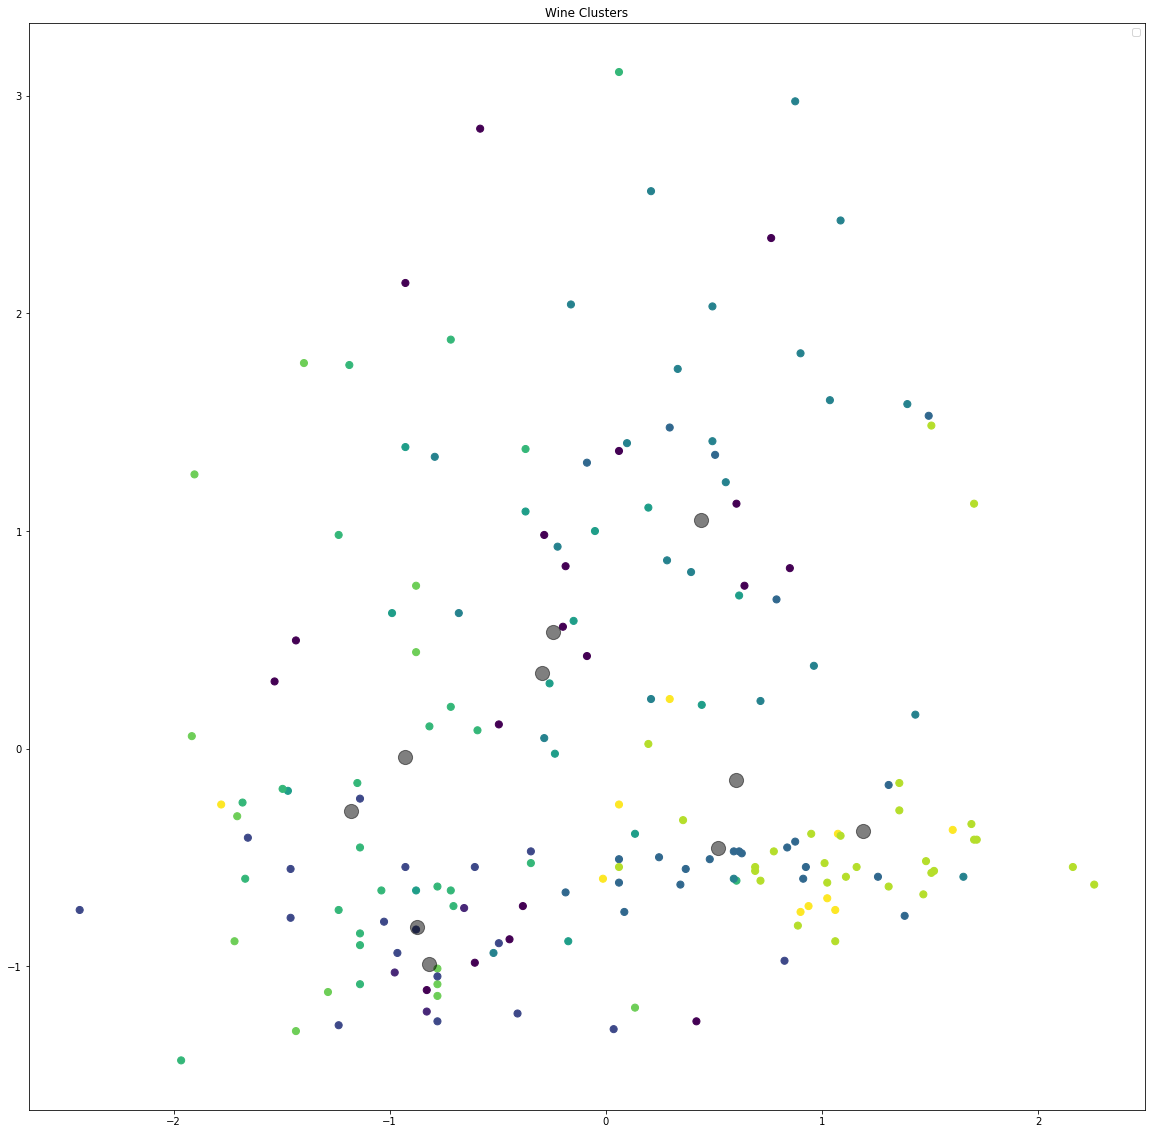

In [18]:
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Wine Clusters')
plt.legend()
plt.show()

The above scatter plot shows the datapoints in the dataset being divided into 10 clusters.

<h3>Using Elbow Method  for Finding the Optimal Number of Clusters in the dataset Wine.csv</h3>

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


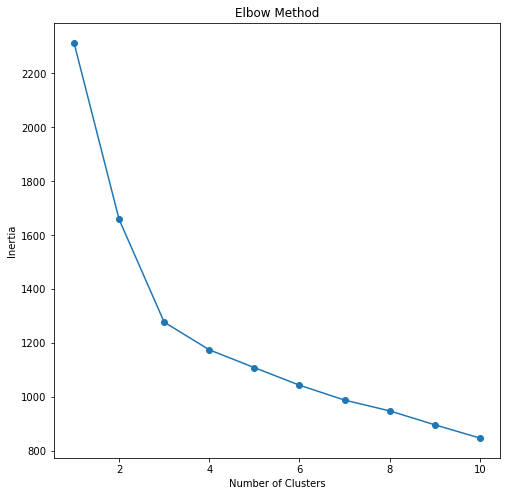

In [19]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8,8))
plt.plot(range(1,11), inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The inertia drops abruptly at 1 and 2 but slowly from 3 onwards. So our optimal number of clusters = 3.

# Applying the optimal number of clusters in KMeans Clustering

In [20]:
model_kmeans = KMeans(n_clusters = 3)
kmeans2_pred = model_kmeans.fit_predict(data_cluster)

In [21]:
pipe = make_pipeline(scaler, model_kmeans)
pipe.fit(data_cluster)
label_sc = pipe.predict(data_cluster)
print(label_sc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


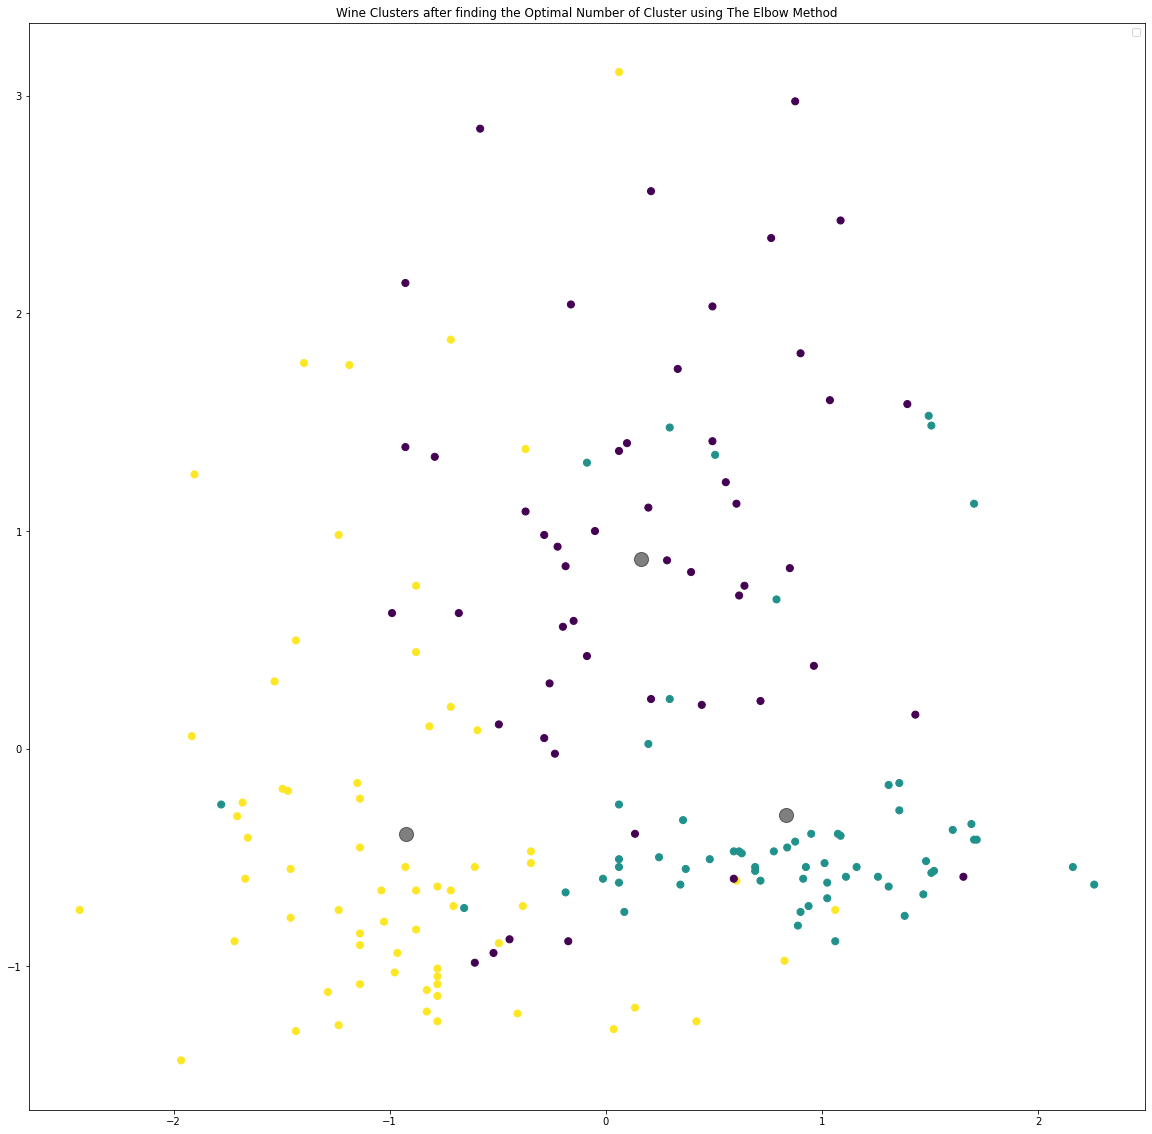

In [22]:
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=label_sc, s=50, cmap='viridis')
centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Wine Clusters after finding the Optimal Number of Cluster using The Elbow Method')
plt.legend()
plt.show()

The above scatter plot shows the datapoints in the dataset being divided into 3 clusters.

# Agglomerative Hierarchial Clustering

In [23]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_agglo)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)

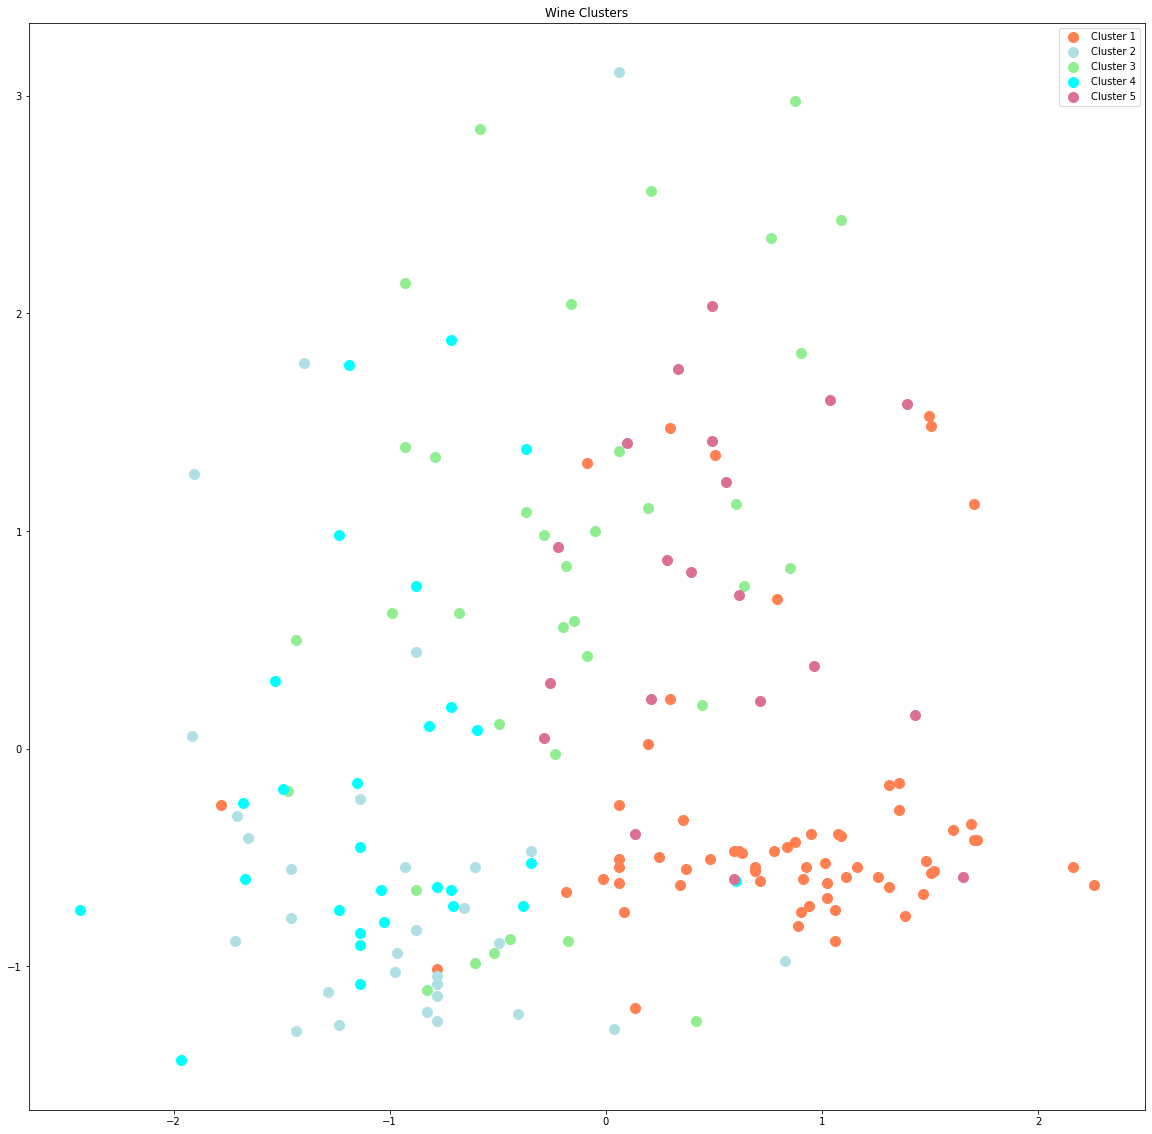

In [24]:
plt.scatter(data_agglo[y_hc == 0,0], data_agglo[y_hc == 0,1], s = 100, c = 'coral', label = 'Cluster 1')
plt.scatter(data_agglo[y_hc == 1,0], data_agglo[y_hc == 1,1], s = 100, c = 'powderblue', label = 'Cluster 2')
plt.scatter(data_agglo[y_hc == 2,0], data_agglo[y_hc == 2,1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(data_agglo[y_hc == 3,0], data_agglo[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_agglo[y_hc == 4,0], data_agglo[y_hc == 4,1], s = 100, c = 'palevioletred', label = 'Cluster 5')
plt.title('Wine Clusters')
plt.legend()
plt.show()

The above scatter plot shows the datapoints in the dataset being divided into 5 clusters.

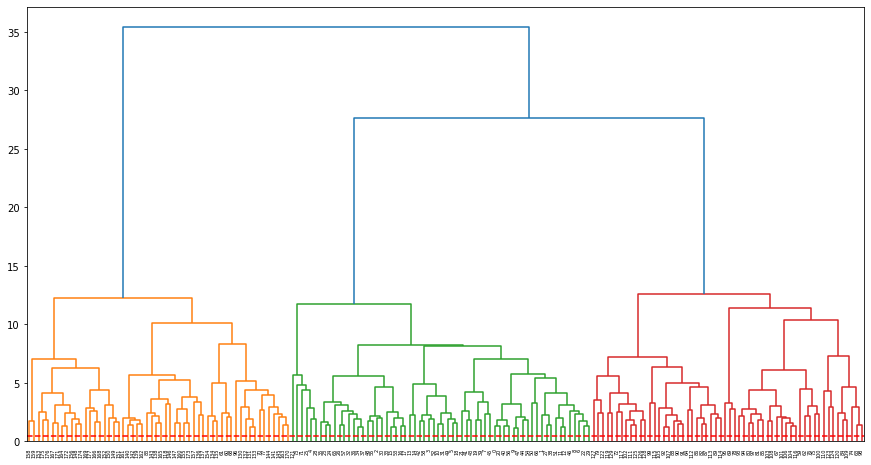

In [25]:
linked = linkage(data_agglo, method ='ward')
plt.figure(figsize=(15,8))
dendrogram(linked, orientation = "top", distance_sort = "ascending", show_leaf_counts = True)
plt.hlines(0.5,0,5000, colors = 'r', linestyles = 'dashed')
plt.show()

From the dendrogram we can notice that the number of clusters is equal to 3.

# Applying the optimal number of clusters in Agglomerative Hierarchical Clustering

In [26]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_agglo)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

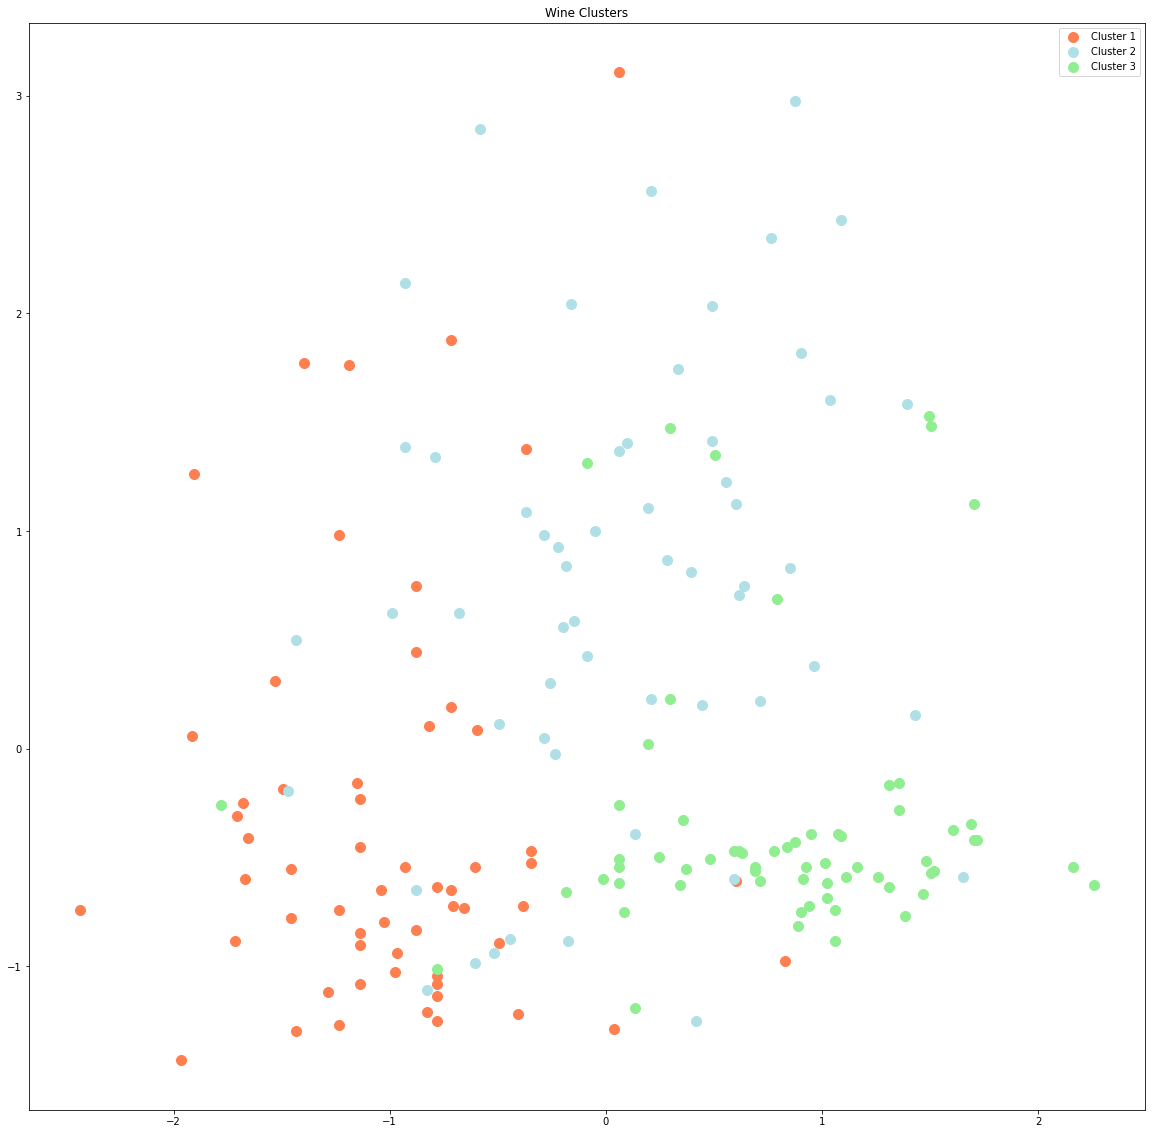

In [27]:
plt.scatter(data_agglo[y_hc == 0,0], data_agglo[y_hc == 0,1], s = 100, c = 'coral', label = 'Cluster 1')
plt.scatter(data_agglo[y_hc == 1,0], data_agglo[y_hc == 1,1], s = 100, c = 'powderblue', label = 'Cluster 2')
plt.scatter(data_agglo[y_hc == 2,0], data_agglo[y_hc == 2,1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.title('Wine Clusters')
plt.legend()
plt.show()

# Principal Component Analysis

In [28]:
# doing PCA
pca = PCA(n_components = 2)
data_2D = pca.fit_transform(data_pca)
data_2D = np.concatenate((data_2D, y_hc[:,None]), axis=1)
pca_final = pd.DataFrame(data_2D, columns=['X', 'Y', 'Label'])
pca_final.head()

,X,Y,Label
0,317.480526,20.019862,2.0
1,302.120494,-4.900581,2.0
2,436.671392,-6.080353,2.0
3,730.880734,0.168345,2.0
4,-11.573773,17.196678,2.0


After PCA we have reduced the dimensionality from 13 to 2

Text(0, 0.5, 'Second Principal Component')

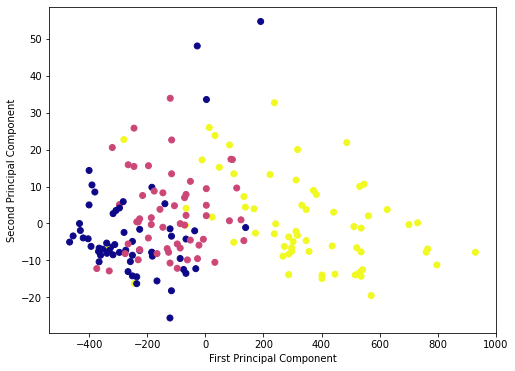

In [29]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=pca_final['Label'] ,cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<h2>Conclusion:</h2>Hence the Wine.csv dataset was divided into 3 clusters with respect to all the clustering algorithms applied in the dataset.    

<h2>Submitted by : Midhuna Prasad R</h2>
<h2>Norka DSA Batch 02 2021</h2>
<h2>Subitted on : 02/02/2022</h2>